In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_excel('output.xlsx',error_bad_lines=False)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17409 entries, 0 to 17408
Data columns (total 16 columns):
Vehicle No            17368 non-null object
Created               17365 non-null object
Total Distance        17365 non-null float64
Distance Travelled    17365 non-null float64
Remaining Distance    17365 non-null float64
No Of Pings           17365 non-null object
Pings Used            17365 non-null float64
Origin                17365 non-null object
Destination           17365 non-null object
Start Time            17365 non-null object
End Time              13484 non-null object
Slot Frequency        17365 non-null object
Tracking Status       17365 non-null object
Driver Count          17365 non-null float64
Companies             17365 non-null object
Drivers               17357 non-null object
dtypes: float64(5), object(11)
memory usage: 2.1+ MB


In [0]:
data.head()

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers
0,HR73A9291,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),2134.62,2302560.0,0.0,39,39.0,Gummidipundi/ Tamil Nadu 601201/ India,Ghaziabad/ Uttar Pradesh/ India,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),Sun Nov 10 2019 02:19:05 GMT+0000 (UTC),[unknown type],Inactive,1.0,MTC Logistics,asis
1,HR73A3318,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),539.70,576540.0,0.0,8,8.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),Sat Nov 02 2019 17:52:45 GMT+0000 (UTC),[unknown type],Inactive,1.0,MTC Logistics,ARSAD
2,HR73A0658,Thu Oct 31 2019 18:36:35 GMT+0000 (UTC),539.70,0.0,0.0,0,0.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:36:34 GMT+0000 (UTC),Sat Nov 02 2019 17:52:42 GMT+0000 (UTC),[unknown type],Inactive,1.0,MTC Logistics,jafru
3,HR47D7760,Thu Oct 31 2019 18:57:26 GMT+0000 (UTC),1845.07,1967290.0,0.0,55,55.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:57:25 GMT+0000 (UTC),Fri Nov 08 2019 05:22:26 GMT+0000 (UTC),[unknown type],Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MOHAMMED KASAM
4,TN54K5834,Thu Oct 31 2019 18:58:23 GMT+0000 (UTC),1845.07,2165870.0,0.0,75,75.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:58:22 GMT+0000 (UTC),Fri Nov 08 2019 05:22:22 GMT+0000 (UTC),[unknown type],Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MURUGAN


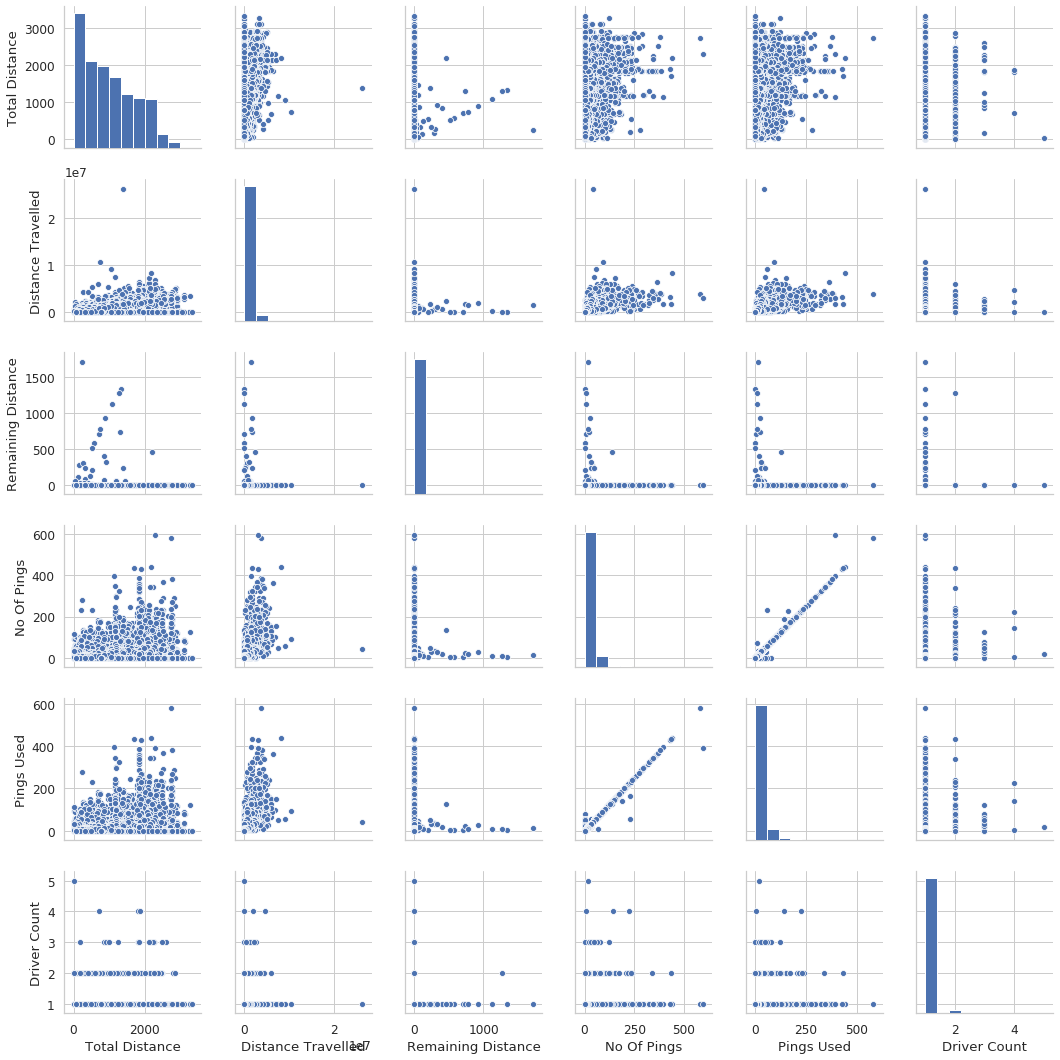

In [0]:
sns.pairplot(data.dropna())

**Total Vehicles in** **Two** **Months** --- **12732**

In [0]:
data['Vehicle No'].nunique()

12732

In [0]:
data['State'] = data['Vehicle No']

In [0]:
def getState(vehicleNumber):
  return vehicleNumber[:2]

Checking With Null Values

In [0]:
data.isna().sum()

Vehicle No              41
Created                 44
Total Distance          44
Distance Travelled      44
Remaining Distance      44
No Of Pings             44
Pings Used              44
Origin                  44
Destination             44
Start Time              44
End Time              3925
Slot Frequency          44
Tracking Status         44
Driver Count            44
Companies               44
Drivers                 52
State                   41
dtype: int64

In [0]:
data.dropna(how='all',inplace=True)
#if all rows are empty are na delete row

# **Deleted the empty rows and data Dealing With Null Values**

In [0]:
data.isna().sum()

Vehicle No               0
Created                  3
Total Distance           3
Distance Travelled       3
Remaining Distance       3
No Of Pings              3
Pings Used               3
Origin                   3
Destination              3
Start Time               3
End Time              3884
Slot Frequency           3
Tracking Status          3
Driver Count             3
Companies                3
Drivers                 11
State                    0
dtype: int64

In [0]:
data['Created'] = data['Created'].fillna(method='ffill')
data['Pings Used'] = data['Pings Used'].fillna(data['Pings Used'].mode())
data.dropna(axis=0,subset=['Origin','Drivers'],inplace = True)
#sns.scatterplot(data['Total Distance'],data['Distance Travelled'])
data['End Time'] = data['End Time'].fillna("ETN")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 17408
Data columns (total 17 columns):
Vehicle No            17357 non-null object
Created               17357 non-null object
Total Distance        17357 non-null float64
Distance Travelled    17357 non-null float64
Remaining Distance    17357 non-null float64
No Of Pings           17357 non-null object
Pings Used            17357 non-null float64
Origin                17357 non-null object
Destination           17357 non-null object
Start Time            17357 non-null object
End Time              17357 non-null object
Slot Frequency        17357 non-null object
Tracking Status       17357 non-null object
Driver Count          17357 non-null float64
Companies             17357 non-null object
Drivers               17357 non-null object
State                 17357 non-null object
dtypes: float64(5), object(12)
memory usage: 2.4+ MB


**Get State Wise Vehicles**

In [0]:
data['State'] = data['Vehicle No'].apply(getState)
data['State'].nunique()

58

In [0]:
data['State'] = data['State'].apply(lambda l : l.upper())

In [0]:
data['State'].nunique()

53

In [0]:
data['State'].value_counts().to_excel("StateWise.xlsx")

**we are having vehicles from 53 unique regions registered vehicles**



# Dealing With Distance

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 17408
Data columns (total 17 columns):
Vehicle No            17357 non-null object
Created               17357 non-null object
Total Distance        17357 non-null float64
Distance Travelled    17357 non-null float64
Remaining Distance    17357 non-null float64
No Of Pings           17357 non-null object
Pings Used            17357 non-null float64
Origin                17357 non-null object
Destination           17357 non-null object
Start Time            17357 non-null object
End Time              17357 non-null object
Slot Frequency        17357 non-null object
Tracking Status       17357 non-null object
Driver Count          17357 non-null float64
Companies             17357 non-null object
Drivers               17357 non-null object
State                 17357 non-null object
dtypes: float64(5), object(12)
memory usage: 2.4+ MB


In [0]:
data['Distance Travelled'] = data['Distance Travelled'].apply(lambda l : l/1000)
#convert distance to KM

[Text(0, 0.5, 'Count'),
 (0, 7000),
 Text(0.5, 0, 'Distance Travelled in Two Months')]

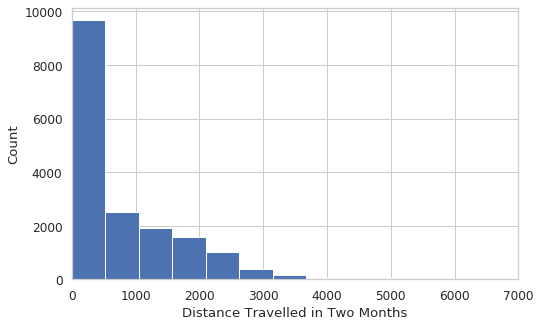

In [0]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data['Distance Travelled'],kde=False,bins = 50,hist_kws={'alpha':1}).set(xlim=(0,7000),xlabel = 'Distance Travelled in Two Months',ylabel = 'Count')

**Less Number of trip are having high(>3000km) Distance travelled**

# Dealing With Total Distance

[Text(0, 0.5, 'Count'),
 (0, 5000),
 Text(0.5, 0, 'Total Distance in Two Months')]

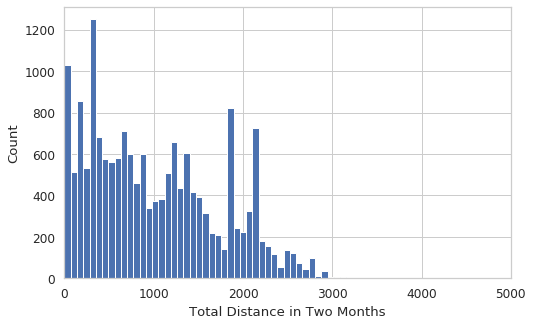

In [0]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data['Total Distance'],kde=False,bins = 
50,hist_kws={'alpha':1}).set(xlim=(0,5000),xlabel = 'Total Distance in Two Months',ylabel = 'Count')

**Total Distamce is in the range of 0 to 3000**

---



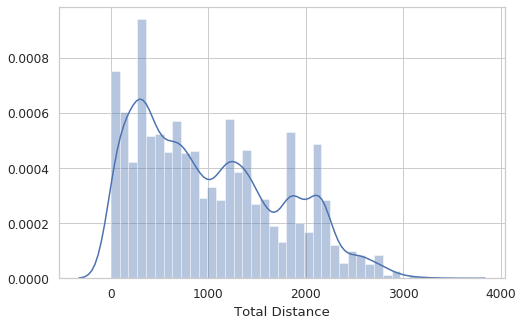

In [0]:
sns.distplot(data['Total Distance'])

# Handling with Number of Pings 

In [0]:
data['No Of Pings'].nunique()

305

Text(0, 0.5, 'Probabblity Density Function')

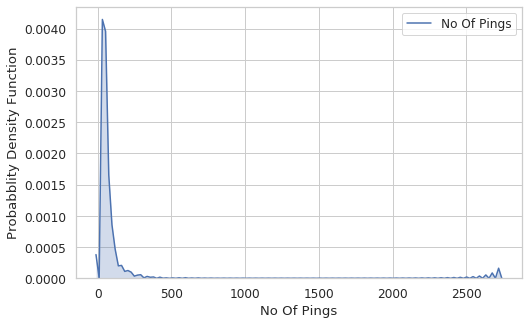

In [0]:
sns.kdeplot(data['No Of Pings'],shade=True)
plt.xlabel('No Of Pings')
plt.ylabel('Probabblity Density Function')

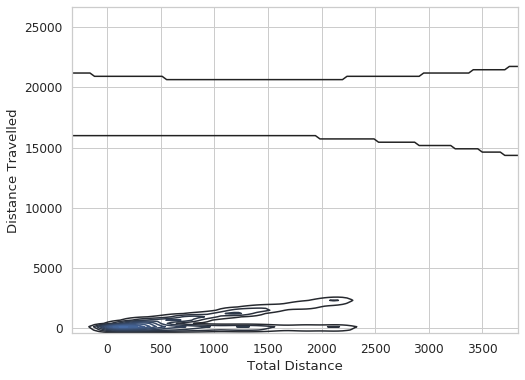

In [0]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 6]})
sns.kdeplot(data['Total Distance'],data['Distance Travelled'])


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 17408
Data columns (total 17 columns):
Vehicle No            17357 non-null object
Created               17357 non-null object
Total Distance        17357 non-null float64
Distance Travelled    17357 non-null float64
Remaining Distance    17357 non-null float64
No Of Pings           17357 non-null object
Pings Used            17357 non-null float64
Origin                17357 non-null object
Destination           17357 non-null object
Start Time            17357 non-null object
End Time              17357 non-null object
Slot Frequency        17357 non-null object
Tracking Status       17357 non-null object
Driver Count          17357 non-null float64
Companies             17357 non-null object
Drivers               17357 non-null object
State                 17357 non-null object
dtypes: float64(5), object(12)
memory usage: 2.4+ MB


**The diffrence between Distance Travelled and Total Distance is some what less.**

In [0]:
def computeDiff(total,traveled):
  return total-traveled

In [0]:
data['diff'] = data['Distance Travelled']-data['Total Distance']

[Text(0, 0.5, 'Count'),
 (-3000, 3000),
 Text(0.5, 0, 'Difference Between Distance Travelled and Total Distance')]

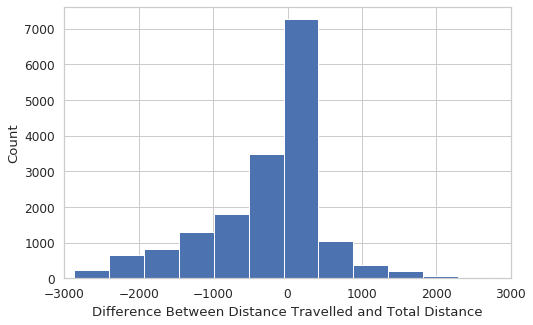

In [0]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data['diff'],kde=False,bins = 
60,hist_kws={'alpha':1}).set(xlim= (-3000,3000),xlabel = 'Difference Between Distance Travelled and Total Distance',ylabel = 'Count')

In [0]:
data['Companies'].nunique()

149

In [0]:
data['Companies'].value_counts()

WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS Control Tower    4085
V TRANS INDIA LIMITED/MUM RO                                  1686
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/L&T _CT              1523
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED                      1333
V TRANS INDIA LIMITED/SOUTH GUJARAT                           1017
                                                              ... 
ARC LIMITED/YLNK                                                 1
CARGO CITY CHENNAI/Rajesh Dhal                                   1
Future Supply Chain Solutions Limited                            1
CARGO CITY CHENNAI/Mumbai                                        1
Everest Industries Ltd/Lakhmapur Plant                           1
Name: Companies, Length: 149, dtype: int64

In [0]:
def countLessThan5(val):
    c = 0
    for i in data['Companies']:
        if(i==val):
            c = c+1
    if(c<5):
        return val

In [0]:
data['LessActiveCompanies'] = data['Companies'].apply(countLessThan5)

**Companies with less active by creating trips less than 5**

In [0]:
data['LessActiveCompanies'].value_counts().to_excel('companies.xlsx')

In [0]:
def count(val):
    c = 0
    for i in data['Companies']:
        if(i==val):
            c = c+1
    if(c>50):
        return val
    else:
        return 'RARE'

In [0]:
data['Companies'] = data['Companies'].apply(count)

In [0]:
data['Companies'].nunique()

39

**Organization wise trip count in two months**

In [0]:
data['Companies'].value_counts()

WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS Control Tower    4085
V TRANS INDIA LIMITED/MUM RO                                  1686
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/L&T _CT              1523
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED                      1333
RARE                                                          1175
V TRANS INDIA LIMITED/SOUTH GUJARAT                           1017
V TRANS INDIA LIMITED/KARNATAKA                                674
V TRANS INDIA LIMITED/PUNE                                     607
V TRANS INDIA LIMITED/NORTH                                    493
Alps Logistics/chennai                                         395
Logistics Plus India Pvt Ltd/MTC                               395
South Eastern Roadways Limited                                 352
V TRANS INDIA LIMITED/ANDHRA                                   304
V TRANS INDIA LIMITED/CHENNAI                                  271
Kuehne Nagel                                                  

**Companies which are more active in two months**

In [0]:
def MoreActiveCompanies(val):
    c = 0
    for i in data['Companies']:
        if(i==val):
            c = c+1
    if(c>1000):
        return val

In [0]:
data['MoreActiveCompanies'] = data['Companies'].apply(MoreActiveCompanies)

In [0]:
data['MoreActiveCompanies'].value_counts()

WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS Control Tower    4085
V TRANS INDIA LIMITED/MUM RO                                  1686
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/L&T _CT              1523
WHITE DATA SYSTEMS INDIA PRIVATE LIMITED                      1333
RARE                                                          1175
V TRANS INDIA LIMITED/SOUTH GUJARAT                           1017
Name: MoreActiveCompanies, dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 17408
Data columns (total 20 columns):
Vehicle No             17357 non-null object
Created                17357 non-null object
Total Distance         17357 non-null float64
Distance Travelled     17357 non-null float64
Remaining Distance     17357 non-null float64
No Of Pings            17357 non-null object
Pings Used             17357 non-null float64
Origin                 17357 non-null object
Destination            17357 non-null object
Start Time             17357 non-null object
End Time               17357 non-null object
Slot Frequency         17357 non-null object
Tracking Status        17357 non-null object
Driver Count           17357 non-null float64
Companies              17357 non-null object
Drivers                17357 non-null object
State                  17357 non-null object
diff                   17357 non-null float64
LessActiveCompanies    85 non-null object
MoreActiveCompanies    10819 non-

In [0]:
data['Slot Frequency'].unique()

array(['[unknown type]', False, True], dtype=object)

There are two types of Slot Frequency are there False True

In [0]:
data['Slot Frequency'].value_counts()

False             16778
[unknown type]      530
True                 49
Name: Slot Frequency, dtype: int64

Replace the unknmown type with false

In [0]:
data['Slot Frequency'] = data['Slot Frequency'].replace('[unknown type]',False)

In [0]:
data['Slot Frequency'].value_counts()

False    17308
True        49
Name: Slot Frequency, dtype: int64

Slot frequency enabled for these vehicle numbers starts with below 

In [0]:
data[data['Slot Frequency']==True]['State'].value_counts()

MH    30
TS     6
DL     6
KA     3
MP     1
AP     1
HR     1
RJ     1
Name: State, dtype: int64

In [0]:
data[data['Slot Frequency']==True]['Companies'].value_counts()

RARE                                46
Alps Logistics/chennai               2
Logistics Plus India Pvt Ltd/MTC     1
Name: Companies, dtype: int64

The above companies are enables slot frequency  but RARE is having 46 createed but those are diffrenet organization with less created tips

**With Slot Frequency Enabled The Trips are very less Created**

In [0]:
data['No Of Pings'] = data['No Of Pings'].replace('Infinity',0)
#there is on row with infinity this is error kind replacing with 0

In [0]:
get_highestPings()

NameError: ignored

The highest pings is 2730

In [0]:
data[data['No Of Pings']==2730]

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies
16194,TN60U4786,Fri Dec 27 2019 06:36:36 GMT+0000 (UTC),2763.16,0.0,0.0,2730,0.0,Sankaramangalam/ Chavara/ Kerala/ India,Bhiwadi/ Rajasthan/ India,Fri Dec 27 2019 06:36:36 GMT+0000 (UTC),ETN,False,Active,1.0,V TRANS INDIA LIMITED/COIMBATORE,ABUTHAHIR K,TN,-2763.16,None,None


In [0]:
data['No Of Pings'].max()

2730

In [0]:
data['Pings Used'].max()

685.0

**High Number Of Pings Used Company**

In [0]:
data[data['Pings Used']== data['Pings Used'].max()]

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies
7294,HR05AD4352,Fri Nov 29 2019 15:51:27 GMT+0000 (UTC),2161.68,3498.12,172.55,362,685.0,Oragadam/ Chennai/ Tamil Nadu/ India,Gurugram/ Haryana/ India,Fri Nov 29 2019 15:51:27 GMT+0000 (UTC),ETN,False,Active,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/KONE,SUBHASH CHAND,HR,1336.44,None,None


In [0]:
data['Distance Travelled'].max()

26228.78

**Maximum Distance Travelled**

In [0]:
data[data['Distance Travelled']==data['Distance Travelled'].max()]

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies
485,TN28AA3789,Sun Nov 03 2019 11:31:16 GMT+0000 (UTC),1392.71,26228.78,0.0,44,44.0,Plot No.318/B/6/ A - 2/ 707 - 709/ GIDC Rd/ 40...,Coimbatore/ Tamil Nadu/ India,Sun Nov 03 2019 11:31:15 GMT+0000 (UTC),Mon Nov 11 2019 09:46:04 GMT+0000 (UTC),False,Inactive,1.0,V TRANS INDIA LIMITED/SOUTH GUJARAT,subramani n,TN,24836.07,None,V TRANS INDIA LIMITED/SOUTH GUJARAT


In [0]:
data['Total Distance'].max()

3508.29

**Maximum Total Distance**

In [0]:
data[data['Total Distance']==data['Total Distance'].max()]

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies
14974,MH12NX0987,Tue Dec 24 2019 08:29:03 GMT+0000 (UTC),3508.29,2391.76,1685.95,278,128.0,Doddaballapura/ Karnataka/ India,Agartala/ Tripura/ India,Tue Dec 24 2019 08:29:03 GMT+0000 (UTC),ETN,False,Active,1.0,TRANSPORT CORPORATION OF INDIA LIMITED/DBP,Agartala,MH,-1116.53,None,None


In [0]:
data.head()

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies
0,HR73A9291,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),2134.62,2302.56,0.0,39,39.0,Gummidipundi/ Tamil Nadu 601201/ India,Ghaziabad/ Uttar Pradesh/ India,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),Sun Nov 10 2019 02:19:05 GMT+0000 (UTC),False,Inactive,1.0,RARE,asis,HR,167.94,None,RARE
1,HR73A3318,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),539.70,576.54,0.0,8,8.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),Sat Nov 02 2019 17:52:45 GMT+0000 (UTC),False,Inactive,1.0,RARE,ARSAD,HR,36.84,None,RARE
2,HR73A0658,Thu Oct 31 2019 18:36:35 GMT+0000 (UTC),539.70,0.00,0.0,0,0.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:36:34 GMT+0000 (UTC),Sat Nov 02 2019 17:52:42 GMT+0000 (UTC),False,Inactive,1.0,RARE,jafru,HR,-539.70,None,RARE
3,HR47D7760,Thu Oct 31 2019 18:57:26 GMT+0000 (UTC),1845.07,1967.29,0.0,55,55.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:57:25 GMT+0000 (UTC),Fri Nov 08 2019 05:22:26 GMT+0000 (UTC),False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MOHAMMED KASAM,HR,122.22,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...
4,TN54K5834,Thu Oct 31 2019 18:58:23 GMT+0000 (UTC),1845.07,2165.87,0.0,75,75.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:58:22 GMT+0000 (UTC),Fri Nov 08 2019 05:22:22 GMT+0000 (UTC),False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MURUGAN,TN,320.80,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...


In [0]:
data['Origin'].nunique()

942

In [0]:
data['OriginArea'] = data['Origin'].apply(lambda l : l.split('/')[0])

In [0]:
data['OriginArea'].nunique()

870

In [0]:
data['OriginArea'].value_counts().to_excel('regionWiseTrips.xlsx')

In [0]:
data['OriginState'] = data['Origin'].apply(lambda l : l.split('/')[1])

In [0]:
data['OriginState'].nunique()

558

In [0]:
data['OriginState'].value_counts()

 Tamil Nadu               2240
 Maharashtra              2198
 Karnataka                 815
B                          765
 India                     675
                          ... 
 Vishal Nagar                1
 Madhya Pradesh 471001       1
 Gujarat 360421              1
 Haryana 131029              1
 A St                        1
Name: OriginState, Length: 558, dtype: int64

In [0]:
data.head()

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies,OriginArea,OriginState
0,HR73A9291,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),2134.62,2302.56,0.0,39,39.0,Gummidipundi/ Tamil Nadu 601201/ India,Ghaziabad/ Uttar Pradesh/ India,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),Sun Nov 10 2019 02:19:05 GMT+0000 (UTC),False,Inactive,1.0,RARE,asis,HR,167.94,None,RARE,Gummidipundi,Tamil Nadu 601201
1,HR73A3318,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),539.70,576.54,0.0,8,8.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),Sat Nov 02 2019 17:52:45 GMT+0000 (UTC),False,Inactive,1.0,RARE,ARSAD,HR,36.84,None,RARE,Gummidipundi,Tamil Nadu 601201
2,HR73A0658,Thu Oct 31 2019 18:36:35 GMT+0000 (UTC),539.70,0.00,0.0,0,0.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,Thu Oct 31 2019 18:36:34 GMT+0000 (UTC),Sat Nov 02 2019 17:52:42 GMT+0000 (UTC),False,Inactive,1.0,RARE,jafru,HR,-539.70,None,RARE,Gummidipundi,Tamil Nadu 601201
3,HR47D7760,Thu Oct 31 2019 18:57:26 GMT+0000 (UTC),1845.07,1967.29,0.0,55,55.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:57:25 GMT+0000 (UTC),Fri Nov 08 2019 05:22:26 GMT+0000 (UTC),False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MOHAMMED KASAM,HR,122.22,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,Vallakkottai,Tamil Nadu 631604
4,TN54K5834,Thu Oct 31 2019 18:58:23 GMT+0000 (UTC),1845.07,2165.87,0.0,75,75.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,Thu Oct 31 2019 18:58:22 GMT+0000 (UTC),Fri Nov 08 2019 05:22:22 GMT+0000 (UTC),False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MURUGAN,TN,320.80,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,Vallakkottai,Tamil Nadu 631604


In [0]:
data['Start Time'].nunique()

17303

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 17408
Data columns (total 22 columns):
Vehicle No             17357 non-null object
Created                17357 non-null object
Total Distance         17357 non-null float64
Distance Travelled     17357 non-null float64
Remaining Distance     17357 non-null float64
No Of Pings            17357 non-null int64
Pings Used             17357 non-null float64
Origin                 17357 non-null object
Destination            17357 non-null object
Start Time             17357 non-null object
End Time               17357 non-null object
Slot Frequency         17357 non-null bool
Tracking Status        17357 non-null object
Driver Count           17357 non-null float64
Companies              17357 non-null object
Drivers                17357 non-null object
State                  17357 non-null object
diff                   17357 non-null float64
LessActiveCompanies    85 non-null object
MoreActiveCompanies    10819 non-nul

In [0]:
from datetime import datetime

In [0]:
data['Start Time'] = pd.to_datetime(data['Start Time'])

In [0]:
def getWeekData(date):
  if(date == 'ETN'):
    return 'ETN'
  weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
  thisXMasDay = date.weekday()
  strweek = weekDays[thisXMasDay]
  return strweek

In [0]:
getWeekData(data['Start Time'][0])

'Thursday'

In [0]:
data['TripDay'] = data['Start Time'].apply(getWeekData)

In [0]:
data['TripDay'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [0]:
data['TripDay'].value_counts()

Friday       3092
Saturday     2949
Thursday     2850
Wednesday    2639
Tuesday      2592
Monday       2354
Sunday        881
Name: TripDay, dtype: int64

Trips are creating more on saturday and Friday. sunday less trips are creating

In [0]:
def getEndTimeData(d):
  if(d == 'ETN'):
    return 'ETN'
  else :
     return pd.to_datetime(d)  

In [0]:
data['End Time'] = data['End Time'].apply(getEndTimeData)

In [0]:
data['EndWeekDay'] = data['End Time'].apply(getWeekData)

In [0]:
data['EndWeekDay'].unique()

array(['Sunday', 'Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Thursday',
       'Monday', 'ETN'], dtype=object)

In [0]:
data['EndWeekDay'].value_counts()

ETN          3879
Monday       3291
Saturday     2348
Thursday     2311
Wednesday    2042
Tuesday      1727
Friday       1414
Sunday        345
Name: EndWeekDay, dtype: int64

In [0]:
data.head()

,Vehicle No,Created,Total Distance,Distance Travelled,Remaining Distance,No Of Pings,Pings Used,Origin,Destination,Start Time,End Time,Slot Frequency,Tracking Status,Driver Count,Companies,Drivers,State,diff,LessActiveCompanies,MoreActiveCompanies,OriginArea,OriginState,TripDay,EndWeekDay
0,HR73A9291,Thu Oct 31 2019 18:30:29 GMT+0000 (UTC),2134.62,2302.56,0.0,39,39.0,Gummidipundi/ Tamil Nadu 601201/ India,Ghaziabad/ Uttar Pradesh/ India,2019-10-31 18:30:29+00:00,2019-11-10 02:19:05+00:00,False,Inactive,1.0,RARE,asis,HR,167.94,None,RARE,Gummidipundi,Tamil Nadu 601201,Thursday,Sunday
1,HR73A3318,Thu Oct 31 2019 18:34:29 GMT+0000 (UTC),539.70,576.54,0.0,8,8.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,2019-10-31 18:34:29+00:00,2019-11-02 17:52:45+00:00,False,Inactive,1.0,RARE,ARSAD,HR,36.84,None,RARE,Gummidipundi,Tamil Nadu 601201,Thursday,Saturday
2,HR73A0658,Thu Oct 31 2019 18:36:35 GMT+0000 (UTC),539.70,0.00,0.0,0,0.0,Gummidipundi/ Tamil Nadu 601201/ India,Coimbatore/ Tamil Nadu/ India,2019-10-31 18:36:34+00:00,2019-11-02 17:52:42+00:00,False,Inactive,1.0,RARE,jafru,HR,-539.70,None,RARE,Gummidipundi,Tamil Nadu 601201,Thursday,Saturday
3,HR47D7760,Thu Oct 31 2019 18:57:26 GMT+0000 (UTC),1845.07,1967.29,0.0,55,55.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,2019-10-31 18:57:25+00:00,2019-11-08 05:22:26+00:00,False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MOHAMMED KASAM,HR,122.22,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,Vallakkottai,Tamil Nadu 631604,Thursday,Friday
4,TN54K5834,Thu Oct 31 2019 18:58:23 GMT+0000 (UTC),1845.07,2165.87,0.0,75,75.0,Vallakkottai/ Tamil Nadu 631604/ India,Bol/ Gujarat/ India,2019-10-31 18:58:22+00:00,2019-11-08 05:22:22+00:00,False,Inactive,1.0,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,MURUGAN,TN,320.80,None,WHITE DATA SYSTEMS INDIA PRIVATE LIMITED/TVS C...,Vallakkottai,Tamil Nadu 631604,Thursday,Friday


In [0]:
data['Start Time'][6].hour

20

Get Time Slots based on Created Time

In [0]:
def getTimeSlots(hour):
  if hour>=11 and hour<=4 :
    return 'Mid Night'
  if hour>=5 and hour<=8 :
    return 'Early Morning'  
  if hour>=9 and hour<=12 :
    return 'Morning'  
  if hour>=13 and hour<=17 :
    return 'Ofternoon'
  if hour>=18 and hour<=20:
    return 'Evening'  
  if hour>=21 and hour<=24 :
    return ' Night'    

In [0]:
data['Time Slot'] = data['Start Time'].apply(lambda l : getTimeSlots(l.hour))

In [0]:
data['Time Slot'].value_counts()

Morning          6523
Ofternoon        4872
Early Morning    3933
Evening           760
 Night            390
Name: Time Slot, dtype: int64

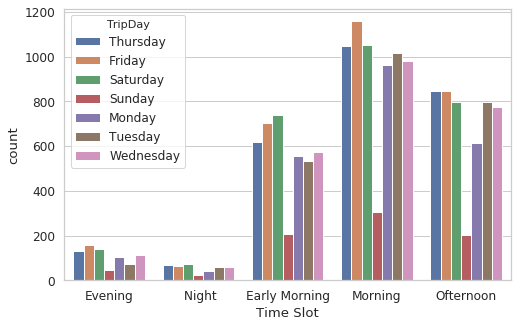

In [0]:
sns.countplot(x='Time Slot',data = data,hue = 'TripDay')